# Messtechnik HS2021 - Tutorial 2

## Aufgabe 1: Linearität in der Spektroskopie
---------
Die Impulseantwort eines Spinsystems in der NMR/EPR kann durch die Blochgleichungen beschrieben werden. In der Annahme des Steady-States (wie z.B. bei continous wave EPR) ist das resultierende Spektrum durch die folgenden Parameter charakterisiert:

Frequenz $\nu$ , longitudinale Relaxationszeit $T_1$, transversale Relaxationszeit $T_2$ und die Anregungsstärke $\nu_1$.

Nehmen Sie für diese Aufgabe an, dass das System sich linear verhält (d.h. die Anregungsstärke klein ist).

---------

### 1a)
Erstellen sie ein Spektrum (Absorptions- und Dispersionsspektrum) im Frequenzbreich $[-10,10]$, welches zwei unterschiedliche Frequenzkomponenten beinhaltet. Die beiden Komponenten sind charakterisiert durch:

Komponente A
- $\nu_A   = 4$
- $T_{1,A} = 10$
- $T_{2,A} = 1$

Komponente B
- $\nu_B   = -2$
- $T_{1,B} = 20$
- $T_{2,B} = 1.5$

70% der angeregten Spins tragen zu Komponente A bei und 30% zu B.

Importieren Sie zu Beginn die gebrauchten Python-libraries und definieren Sie anschliessend alle oben genannten Parameter.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from Bloch import Bloch_stationary

# Komponente A
frq_A  = 4
T1_A   = 10
T2_A   = 1
frac_A = 0.7

# Komponente B
frq_B  = -2
T1_B   = 20
T2_B   = 1.5
frac_B = 0.3


### 1b)
Verwenden Sie die Funktion `Bloch_stationary()` aus den Modul `Bloch.py` um das Spektrum zu berechnen. Um die Inputparameter und die Eingabereihenfolge für die Funktion `Bloch_stationary()` herauszufinden, können Sie die Helpfunktion `help(function)` von Python verwenden. 

In [11]:
help(Bloch_stationary)


Help on function Bloch_stationary in module Bloch:

Bloch_stationary(frq_axis, frq, T1, T2, nu1=0.002)
    Computes spectrum from specification of a single spectral line and an
    optional frequency axis based on stationary solutions of the Bloch
    equations
    an appropriate frequency axis is determined, if none is provided
    
    Input parameters:
        frq_axis  frequency axis
        frq       frequency offset from carrier (resonance offset)
        T1        longitudinal relaxation time
        T2        transverse relaxation time
    Optional parameters:
        nu1       irradiation amplitude (default=0.002, linear regime)
    Output parameters:
        spectrum  complex spectrum, real part absorption, imaginary part dispersion
    
    Luis Fabregas, 2020 adapted from G. Jeschke, 2011, for lecture course Messtechnik



In [12]:
# Konstruiere Frequenzachse
frq_axis = np.linspace(-10,10,1024)

# Berechnen von Spektren mit Bloch_stationary
spc_A = Bloch_stationary(frq_axis,frq_A,T1_A,T2_A)
spc_B = Bloch_stationary(frq_axis,frq_B,T1_B,T2_B)

spc   = frac_A*spc_A + frac_B*spc_B # Annahme der Linearität, Einzelspektren können aufsummiert werden


### 1c)
Berechnen Sie das Amplitudenverhältnis der beiden Spektralkomponenten und kommentieren Sie das Ergebnis. Weshalb entspricht es nicht dem Verhältnis der angeregten Spins?

In [13]:
maxA  = np.amax(np.real(frac_A*spc_A))
maxB  = np.amax(np.real(frac_B*spc_B))
ratio = maxA/maxB
ratio

1.5623344743932452

Das Verhältnis der unterschiedlichen Komponenten widerspiegelt sich nicht in den Amplituden, sondern in den integralen Intensitäten ($7/3 \approx 2.33$). Hier ist die Linie mit dem grösseren Anteil breiter als diejenige mit dem kleineren Anteil. Daher ist das Amplitudenverhältnis kleiner ($\approx 1.56$).

### 1d)
Plotten Sie das berechnete Spektrum, beschriften Sie die Achsen korrekt und erstellen Sie eine Legende, um den Real- und Imaginärteil zu beschriften.
(Infos zu allen Funktionen in matlibplot.pyplot finden Sie [hier](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)).

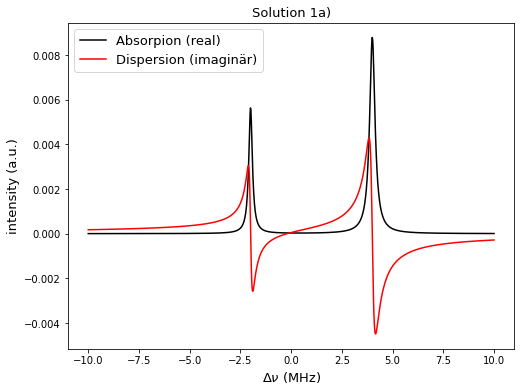

In [14]:
# Plot
plt.figure(figsize=(8,6))
plt.plot(frq_axis,np.real(spc),'k')
plt.plot(frq_axis,np.imag(spc),'r')
plt.xlabel('$\Delta\\nu$ (MHz)',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.legend(['Absorpion (real)','Dispersion (imaginär)'],fontsize=13)
plt.title('Solution 1a)',fontsize=13);

### 1e)
Schreiben Sie eine Funktion `Bloch_stationary_multiline()`, die als Input Listen von Parametern akzeptiert und so ein Mehrlinienspektrum berechnet. Testen Sie Ihre geschriebene Funktion mit den unten angegebenen Parametern. Um zu sehen wie eine Funktion aufgebaut ist können Sie die `Bloch.py`-Datei öffnen und schauen, wie die `Bloch_stationary`-Funktion geschrieben wurde. Wenn Sie noch Informationen zum `numpy`-package brauchen, finden sie diese [hier](https://numpy.org/doc/stable/reference/routines.html).
 *Hinweis:* Ein `for`-loop in der Funktion kann sehr hilfreich sein.

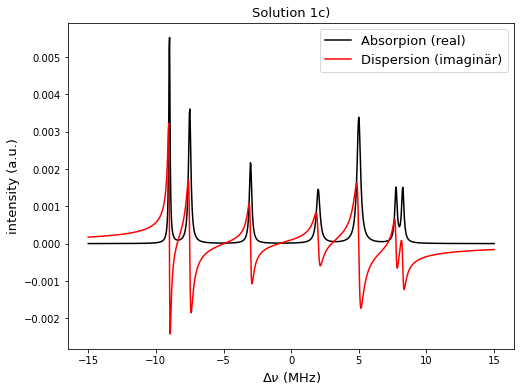

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

def Bloch_stationary_multiline(frq_axis,frq,T1,T2,fraction):
    N = len(frq)
    spectrum = np.zeros_like(frq_axis)
    fraction = fraction/np.sum(fraction) # normalization
    for i in range(N):
        currspc = Bloch_stationary(frq_axis,frq[i],T1[i],T2[i])
        spectrum = spectrum + fraction[i]*currspc
    return spectrum

# specify spectrum as line list
frq = [-9, -7.5, -3,2, 5, 7.75, 8.25]
T1  = [10, 12, 15, 10, 10, 20, 20]
T2  = [3, 1.5, 1.5, 1, 1, 1.5, 1.5]
fraction = [4, 5, 3, 3, 7, 2, 2]

# define the frequency axis
frq_axis = np.linspace(-15,15,1024)

# spectrum calculation
spc = Bloch_stationary_multiline(frq_axis,frq,T1,T2,fraction)

plt.figure(figsize=(8,6))
plt.plot(frq_axis,np.real(spc),'k')
plt.plot(frq_axis,np.imag(spc),'r')
plt.xlabel('$\Delta\\nu$ (MHz)',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.legend(['Absorpion (real)','Dispersion (imaginär)'],fontsize=13)
plt.title('Solution 1c)',fontsize=13);

### 1f)
Das Spektrum kann mathematisch beschrieben werden als
$$ S(\nu) = ( A(\nu) + \mathrm{i} D(\nu) ) \cdot \exp{(\mathrm{i}\phi)} $$
wobei $A(\nu)$ das Absorptionssignal, $D(\nu)$ das Dispersionssignal und $\phi$ eine Phasen sind. Die Phasenverschiebung durch $\phi$ muss korrigiert werden, dass nur das reine Absorptions- und Dispersionsspektrum analysiert werden kann. Diese Phasenkorrektur kann vorgenommen werden, indem man den oberen Ausdruck umformt zu:
$$ S(\nu) \cdot \exp{(-\mathrm{i}\phi)}  = A(\nu) + \mathrm{i} D(\nu) $$

Probieren Sie die Phase des gegebenen Signals (`spc_uncorr`) so zu korrigieren, dass das reine Absorptions- und Dispersionsspektrum entsteht.



Text(0.5, 0.98, 'Solution 1f)')

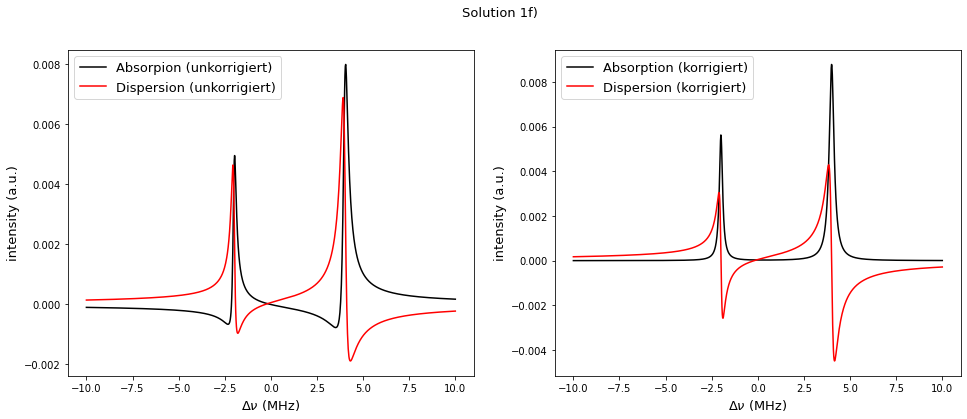

In [28]:
import math as m

data = np.load('signal_uncorrected.npz')
frq_axis   = data['frq_axis']
spc_uncorr = data['spc']

phase = m.pi/5
spc_corr = spc_uncorr*np.exp(-1j*phase)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(frq_axis,np.real(spc_uncorr),'k')
plt.plot(frq_axis,np.imag(spc_uncorr),'r')
plt.xlabel('$\Delta\\nu$ (MHz)',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.legend(['Absorpion (unkorrigiert)','Dispersion (unkorrigiert)'],fontsize=13,loc=2)
plt.subplot(122)
plt.plot(frq_axis,np.real(spc_corr),'k')
plt.plot(frq_axis,np.imag(spc_corr),'r')
plt.xlabel('$\Delta\\nu$ (MHz)',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.legend(['Absorption (korrigiert)','Dispersion (korrigiert)'],fontsize=13)
plt.suptitle('Solution 1f)',fontsize=13);

## Aufgabe 2: Lineares Verhalten vs. Nicht-lineares Verhalten / Sättigung (optional)
---------
Der Sättigungsparameter $S = (2\pi \nu_1)^2 T_1 T_2 $ beschreibt, ob ein Spinübergang als lineares System betrachtet werden kann. Um eine Abweichung vom linearen Verhalten zu erkennen muss die Abhängigkeit der Amplitude, integralen Intensität und der Linienform einer Spektralkomponente von der Anregungsstärke $\nu_1$ betrachet werden.

---------

### 2a)
Schreiben Sie eine Funktion, welche die maximale Amplitude, die integrale Intensität und die Linienform anhand der Full-Width-Half-Maximum (FWHM) für unterschiedliche Anregungsstärken $\nu_1$ berechnet. Teste deine Funktion mit den unten angegebenen Spinsystem-Parametern ($\nu,T_1,T_2$) für Anregungstärken $\nu_1 = [0.0001,0.1]$.
*Hinweis:* Um ein Integral zu berechnen können Sie die Numpy-Funktion `np.trapz()` verwenden.

In [16]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from Bloch import Bloch_stationary

def Bloch_saturation(frq_axis,frq,T1,T2,nu1):
    amplitude = np.zeros_like(nu1)
    integral  = np.zeros_like(nu1)
    fwhm      = np.zeros_like(nu1)

    for i in range(len(nu1)):
        currnu       = nu1[i]
        currspc      = Bloch_stationary(frq_axis,frq,T1,T2,currnu)
        amplitude[i] = np.amax(np.real(currspc))
        integral[i]  = np.trapz(np.real(currspc))
        halfmax      = np.amax(np.real(currspc))/2
        idx_max      = np.nonzero(np.real(currspc) == np.amax(np.real(currspc)))[0][0]
        spc_low      = np.real(currspc[0:idx_max])
        spc_high     = np.real(currspc[idx_max+1:len(currspc)])
        fwhm_low     = np.abs(spc_low - halfmax).argmin()
        fwhm_high    = np.abs(spc_high - halfmax).argmin()
        fwhm[i]      = frq_axis[fwhm_high+idx_max] - frq_axis[fwhm_low]
    return amplitude,integral,fwhm

# Spinsystem Parameter
frq_axis = np.linspace(-5,5,16384)
frq = 0
T1  = 10
T2  = 1

# Teste Bloch_saturation Funktion
nu1 = np.linspace(0.0001,0.1,2048)
amplitude,integral,fwhm = Bloch_saturation(frq_axis,frq,T1,T2,nu1)

### 2b)
Plotten Sie die maximale Amplitude, die integrale Intensität und die Full-Width-Half-Maximum (FWHM) in Abhänigkeit von der Anregungsstärke $\nu_1$ und dem Sättigungsparameter $S$. Überlegen Sie sich anhand dieser Plots in welchem Bereich von $\nu_1$ und $S$ das Spinsystem als linear betrachtet werden kann. Wie verhalten sich die maximale Amplitude, die integrale Intensität und die FWHM unterschiedlich im linearen und nicht-linearen Bereich?

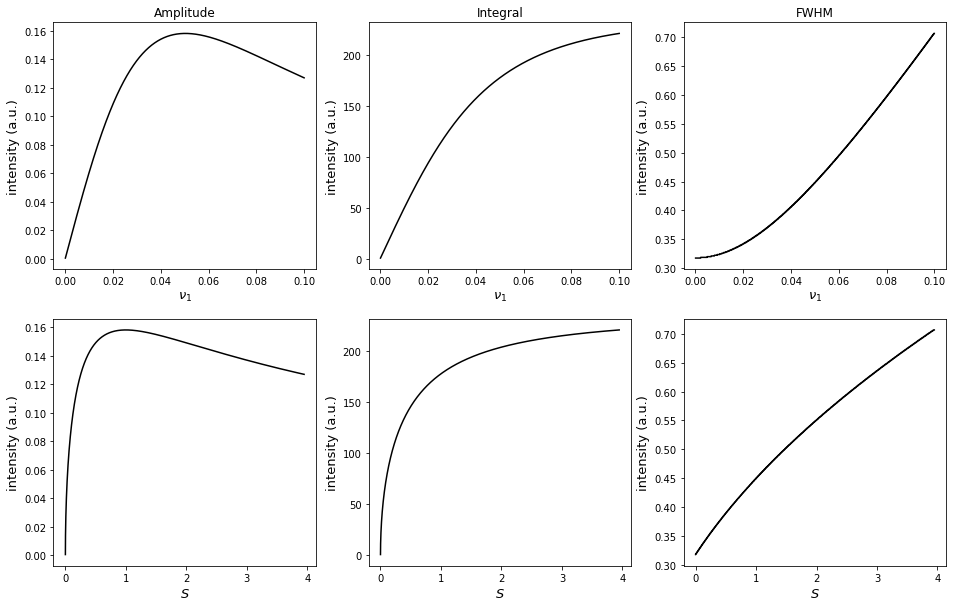

In [17]:
S = ((2*m.pi*nu1)**2)*T1*T2

plt.figure(figsize=(16,10))

# Plot maximale Amplitude
plt.subplot(231)
plt.plot(nu1,amplitude,'k')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.title('Amplitude')
plt.subplot(234)
plt.plot(S,amplitude,'k')
plt.xlabel('$S$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)

# Plot integral Intensität
plt.subplot(232)
plt.plot(nu1,integral,'k')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.title('Integral')
plt.subplot(235)
plt.plot(S,integral,'k')
plt.xlabel('$S$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)

# Plot FWHM
plt.subplot(233)
plt.plot(nu1,fwhm,'k')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.title('FWHM')
plt.subplot(236)
plt.plot(S,fwhm,'k')
plt.xlabel('$S$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13);

### 2c)
Bestimmen Sie die Steigungen der Amplitude und der integralen Intensität im linearen Bereich als Funktion von $\nu_1$:

- $ A_{\text{max}}(\nu_1) = c_1 \nu_1 $
- $ I(\nu_1) \; \; \; \; \; \;= c_2 \nu_1 $

Plotten Sie die Abhängigkeit der Amplitude und integralen Intensität von der Anregungsstärke $\nu_1$ zusammen mit der linearen Approximation.
Berechnen und plotten Sie das Verhältnis zwischen der tatsächlichen und linear approximierten Amplitude / integralen Intensität ($A_{\text{real}}/A_{\text{lin}}$ und $I_{\text{real}}/I_{\text{lin}}$) in Abhänigkeit von $\nu_1$ und $S$.

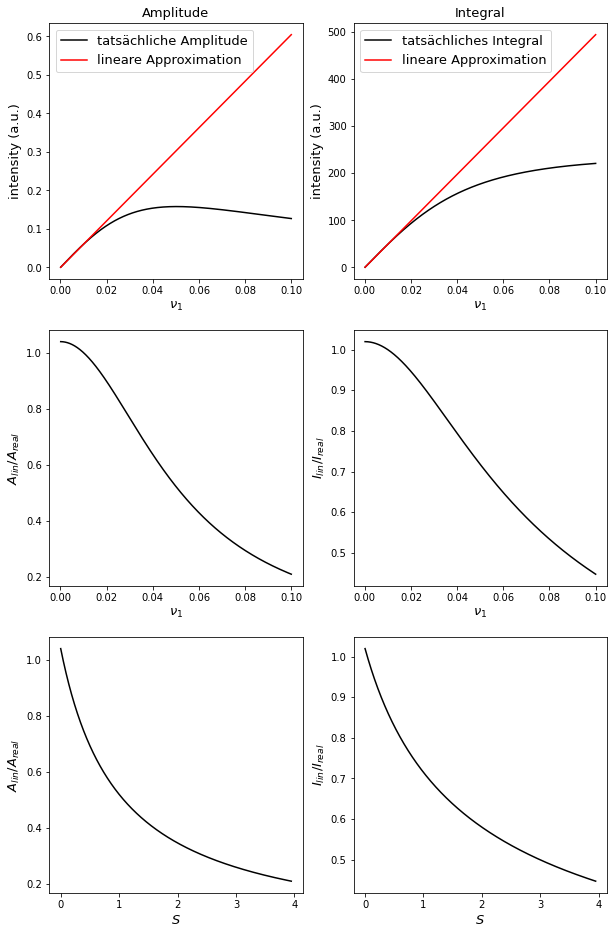

In [18]:
linlim  = 0.01
idx_lim = np.abs(nu1-linlim).argmin()
c1 = amplitude[idx_lim]/nu1[idx_lim]
c2 = integral[idx_lim]/nu1[idx_lim]

amplitude_lin = c1*nu1
integral_lin  = c2*nu1

Aratio = amplitude/amplitude_lin
Iratio = integral/integral_lin

plt.figure(figsize=(10,16))

# Plot maximale Amplitude
plt.subplot(321)
plt.plot(nu1,amplitude,'k')
plt.plot(nu1,amplitude_lin,'r')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.legend(['tatsächliche Amplitude','lineare Approximation'],fontsize=13)
plt.title('Amplitude',fontsize=13)
plt.subplot(323)
plt.plot(nu1,Aratio,'k')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('$A_{lin}/A_{real}$',fontsize=13)
plt.subplot(325)
plt.plot(S,Aratio,'k')
plt.xlabel('$S$',fontsize=13)
plt.ylabel('$A_{lin}/A_{real}$',fontsize=13)

# Plot integral Intensität
plt.subplot(322)
plt.plot(nu1,integral,'k')
plt.plot(nu1,integral_lin,'r')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('intensity (a.u.)',fontsize=13)
plt.legend(['tatsächliches Integral','lineare Approximation'],fontsize=13)
plt.title('Integral',fontsize=13)
plt.subplot(324)
plt.plot(nu1,Iratio,'k')
plt.xlabel('$\\nu_1$',fontsize=13)
plt.ylabel('$I_{lin}/I_{real}$',fontsize=13)
plt.subplot(326)
plt.plot(S,Iratio,'k')
plt.xlabel('$S$',fontsize=13)
plt.ylabel('$I_{lin}/I_{real}$',fontsize=13);

